In [3]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read pre-processed data
data = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/preprocessed_twitter_2013_gezi.csv')

In [6]:
print(data)

       Unnamed: 0                                              tweet  \
0               0  10k yellow gold blue colored. blue cluster col...   
1               1  14k yellow/white gold 0.04 ct. diamond 7 004 d...   
2               2  stop 3qt red sand scoop{ special } free shovel...   
3               3  solid report claims iphone 5s available gold, ...   
4               4  gold boss chain necklace fashion accessories shop   
...           ...                                                ...   
22249       22249  2.75 carat citrine diamond cocktail ring 275 a...   
22250       22250  1.25 carat (ctw) sterling silver round diamond...   
22251       22251  1.50 carat ctw 6 mm real natural genuine 150 1...   
22252       22252  blue topaz tear drop earrings 7 carat ctw blue...   
22253       22253  wellen brillantenring 0.12 carat gelbgold weis...   

       Subjectivity  Polarity  Analysis  
0          0.040000  0.000000   Neutral  
1          0.000000  0.000000   Neutral  
2        

In [7]:
# getting labels from pre-processed dataset
label = data.iloc[:, -1:].values
print(label)

[['Neutral']
 ['Neutral']
 ['Positive']
 ...
 ['Positive']
 ['Neutral']
 ['Neutral']]


In [8]:
# data.iloc[:,:-1] get all the columns except label column - for the X_train
X_train, X_test, y_train, y_test = train_test_split (data['tweet'], label, test_size=0.2, random_state=0)

In [9]:
# label encoder
Encoder = LabelEncoder()
print(y_train[:10])

y_train = Encoder.fit_transform(y_train)
print(y_train[:10])

y_test = Encoder.fit_transform(y_test)

[['Neutral']
 ['Neutral']
 ['Neutral']
 ['Neutral']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Neutral']
 ['Neutral']
 ['Neutral']]
[1 1 1 1 2 2 2 1 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = LinearSVC()

# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [12]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [13]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9977533138620535


### 2. Learning Curve

In [14]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  160   483   807  1131  1455  1778  2102  2426  2749  3073  3397  3721
  4044  4368  4692  5015  5339  5663  5986  6310  6634  6958  7281  7605
  7929  8252  8576  8900  9224  9547  9871 10195 10518 10842 11166 11490
 11813 12137 12461 12784 13108 13432 13756 14079 14403 14727 15050 15374
 15698 16022]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.6s finished


In [15]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
train_std = np.std(train_scores, axis=1)

In [17]:
test_mean = np.mean(test_scores, axis=1)

In [18]:
#standard dev.
test_std = np.std(test_scores, axis=1)

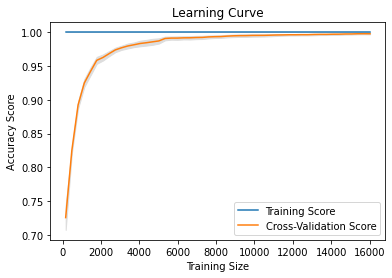

In [19]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

### 2. Model Evaluation
>**TN / True Negative:** the case was negative and predicted negative<br>
**TP / True Positive:** the case was positive and predicted positive<br>
**FN / False Negative:** the case was positive but predicted negative<br>
**FP / False Positive:** the case was negative but predicted positive<br>

#### 2.1. Accuracy

In [20]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9977533138620535


#### 2.2. F-Measure
>**What percent of positive predictions were correct?**<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [21]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.9978642335305441


#### 2.3. Precision
>**Accuracy of positive predictions.**<br>
Precision = TP/(TP + FP)

In [22]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.9986257791819492


#### 2.4. Recall
>**What percent of the positive cases did you catch?**<br>
Recall = TP/(TP+FN)



In [23]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.9971098117707573


#### 2.5. AUC (Area Under Curve)
>*AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.<br>
A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.*

>We have three classes in the dataset. Therefore, we will calculate ROC value for all classes.<br>
**Labels are expressed in binary format with one-hot encoding.**<br>
***ROC Curve is obtained as much as the number of classes.***

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


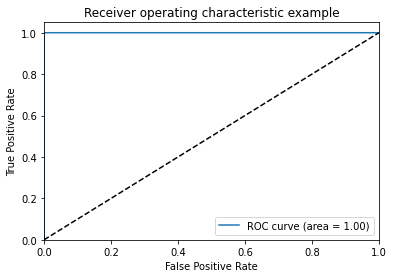

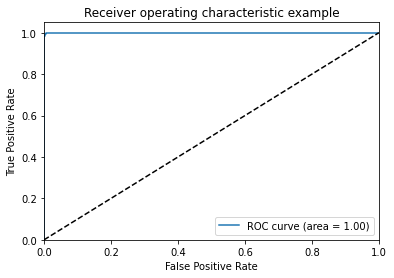

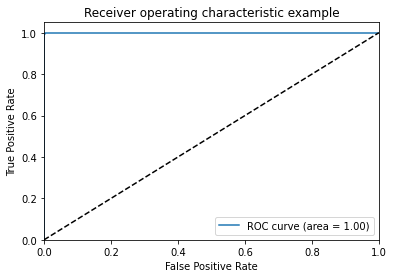

In [24]:
X, y = data['tweet'], label

y = Encoder.fit_transform(y)

y = preprocessing.label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))

# classifier
clf = OneVsRestClassifier(LinearSVC())

# train
y_score = clf.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)

# predict the labels on validation dataset
#predictions_SVM = clf.predict(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()